In [64]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib as plt

In [65]:
#Read in data and drop duplicates if any
combine_data = pd.read_csv("Data_Bowl_combine.csv")
print(combine_data.head)
combine_data = combine_data.drop_duplicates()

<bound method NDFrame.head of                 Player   Pos  Ht   Wt  Forty  Vertical  BenchReps  BroadJump  \
0         John Abraham   OLB  76  252   4.55       NaN        NaN        NaN   
1      Shaun Alexander    RB  72  218   4.58       NaN        NaN        NaN   
2       Darnell Alford    OT  76  334   5.56      25.0       23.0       94.0   
3         Kyle Allamon    TE  74  253   4.97      29.0        NaN      104.0   
4     Rashard Anderson    CB  74  206   4.55      34.0        NaN      123.0   
...                ...   ...  ..  ...    ...       ...        ...        ...   
6213      Chris Worley   ILB  74  238   4.86      29.5       15.0        NaN   
6214       Isaiah Wynn     G  75  313    NaN       NaN        NaN        NaN   
6215      Isaac Yiadom    CB  73  190   4.52       NaN        8.0      120.0   
6216       Kenny Young   ILB  73  236   4.60      36.0       23.0      117.0   
6217      Trevon Young  EDGE  76  258   4.78      33.0       25.0      114.0   

      Con

<AxesSubplot:title={'center':'Forty'}, xlabel='Pos'>

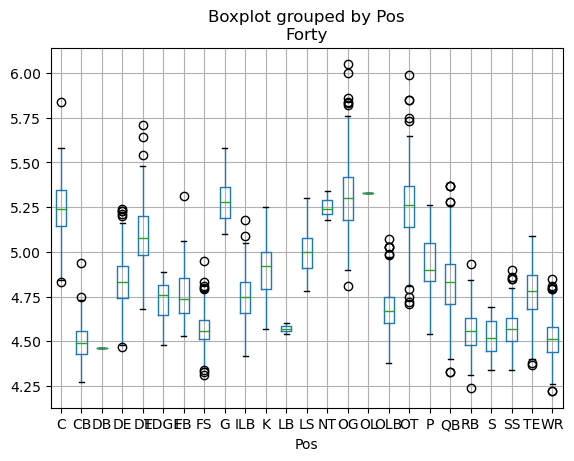

In [66]:
#I would like to plot some features with boxplots after aggregating by position just to compare among positions
combine_data.boxplot(column='Forty', by='Pos')
#It is probably better to combine groups that have similar scores like O-line and Safeties/CBs maybe.
#Probably should remove Kicker and Punter, too.

In [67]:
#Combine positions usually considered roughly equivalent
new = 'C', 'G', 'OG', 'OL', 'OT'
combine_data['Pos'] = combine_data['Pos'].replace(new, 'OL')
combine_data['Pos'].nunique()


new = 'FS', 'SS', 'S', 'DB', 'CB'
combine_data['Pos'] = combine_data['Pos'].replace(new, 'DB')
combine_data['Pos'].nunique()


new = 'TE', 'FB'
combine_data['Pos'] = combine_data['Pos'].replace(new, 'TE')
combine_data['Pos'].nunique()

new = 'NT', 'DL', 'DT'
combine_data['Pos'] = combine_data['Pos'].replace(new, 'DT')
combine_data['Pos'].nunique()


new = 'LB', 'OLB', 'ILB'
combine_data['Pos'] = combine_data['Pos'].replace(new, 'LB')
combine_data['Pos'].nunique()


new = 'EDGE'
combine_data['Pos'] = combine_data['Pos'].replace(new, 'DE')
combine_data['Pos'].nunique()


#Remove K, P, LS
new = 'K' , 'P' , 'LS'
combine_data = combine_data[~combine_data['Pos'].isin(new)]
combine_data['Pos'].nunique()

9

In [68]:
#Just checking number of each position
combine_data['Pos'].value_counts()

DB    1101
OL    1012
WR     857
LB     703
RB     540
DE     510
DT     466
TE     454
QB     350
Name: Pos, dtype: int64

In [69]:
#Get raw NA proportions for each feature
missing = combine_data.isna().sum()
missing = missing/len(combine_data) * 100
print(missing)

Player        0.000000
Pos           0.000000
Ht            0.000000
Wt            0.000000
Forty         2.052394
Vertical     20.206908
BenchReps    30.118472
BroadJump    20.907726
Cone         33.439012
Shuttle      32.270983
Year          0.000000
Pfr_ID       20.357083
AV            0.000000
Team         38.628400
Round        38.628400
Pick         38.628400
dtype: float64


In [70]:
#Get missing amount after removing UDFAs
no_UDFAs = combine_data[~combine_data['Round'].isna()]
missing_no_UDFAs = no_UDFAs.isna().sum()
missing_no_UDFAs = missing_no_UDFAs/len(no_UDFAs) * 100
print(missing_no_UDFAs)

Player        0.000000
Pos           0.000000
Ht            0.000000
Wt            0.000000
Forty         1.114736
Vertical     20.418706
BenchReps    29.771615
BroadJump    21.179989
Cone         33.143013
Shuttle      32.300163
Year          0.000000
Pfr_ID        2.283850
AV            0.000000
Team          0.000000
Round         0.000000
Pick          0.000000
dtype: float64


In [71]:
#Sort by position
no_UDFAs = no_UDFAs.sort_values(by= 'Pos')
no_UDFAs.head

<bound method NDFrame.head of                 Player Pos  Ht   Wt  Forty  Vertical  BenchReps  BroadJump  \
4310        Josh Evans  DB  73  207   4.58      34.5        NaN      123.0   
1101         Cato June  DB  72  218   4.61      35.0        NaN      113.0   
3267     Javier Arenas  DB  69  197   4.60       NaN        NaN      112.0   
1106     Terrence Kiel  DB  71  204   4.46      38.0       16.0      127.0   
4572     Ricardo Allen  DB  69  187   4.61      35.5       13.0      117.0   
...                ...  ..  ..  ...    ...       ...        ...        ...   
4342      Chris Harper  WR  73  229   4.55      35.5       20.0      116.0   
680     Antonio Bryant  WR  73  188   4.57      37.0        NaN      121.0   
5116     Ty Montgomery  WR  72  221   4.55      40.5        NaN      121.0   
3848      Cecil Shorts  WR  72  205   4.50      34.5       21.0      114.0   
3008  Dominique Edison  WR  74  204   4.42      37.0        NaN      120.0   

      Cone  Shuttle  Year    Pfr_

<AxesSubplot:title={'center':'Forty'}, xlabel='Pos'>

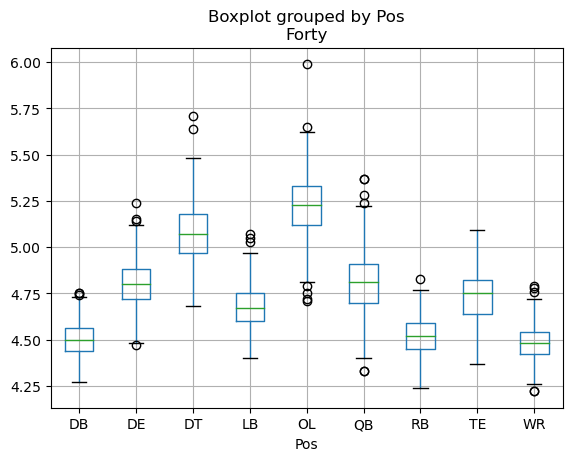

In [72]:
#Now proceed with just the no UDFA dataframe. Displaying 40 time boxplot of cleaned dataframe
no_UDFAs.boxplot(column='Forty', by='Pos')
#Obviously, skill positions are faster on average

<AxesSubplot:title={'center':'Ht'}, xlabel='Pos'>

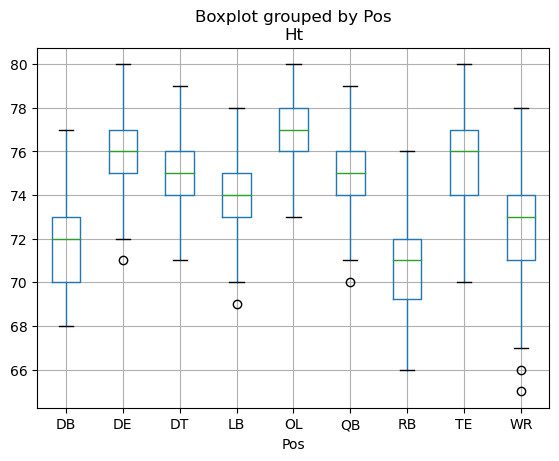

In [73]:
#Boxplot of Height by position
no_UDFAs.boxplot(column='Ht', by='Pos')
#Lineman for both offense and defense are typically the tallest players, which is expected for their roles

<AxesSubplot:title={'center':'Wt'}, xlabel='Pos'>

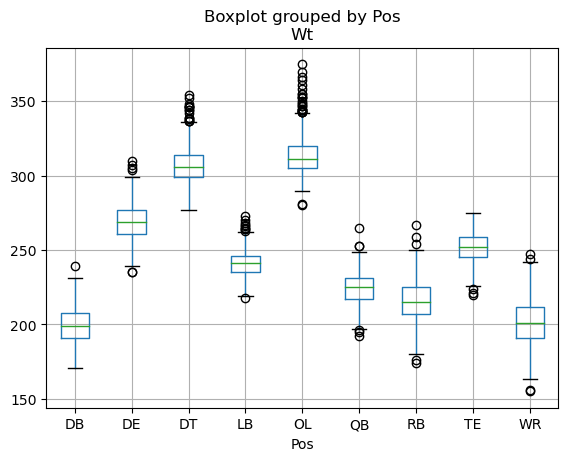

In [74]:
#Weight
no_UDFAs.boxplot(column='Wt', by='Pos')
#Lineman for both offense and defense are typically the heaviest players, which is expected for their roles

<AxesSubplot:title={'center':'Vertical'}, xlabel='Pos'>

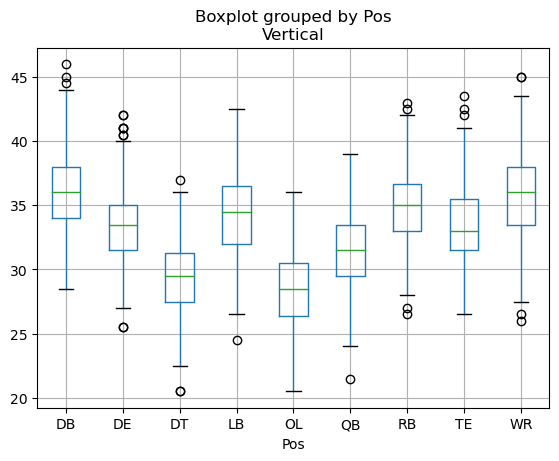

In [75]:
#Vertical Jump
no_UDFAs.boxplot(column='Vertical', by='Pos')
#Skill positions again have higher Vertical Jump which is expected due to their positions needing fast-twitch and althelticism moreso than others.

<AxesSubplot:title={'center':'BenchReps'}, xlabel='Pos'>

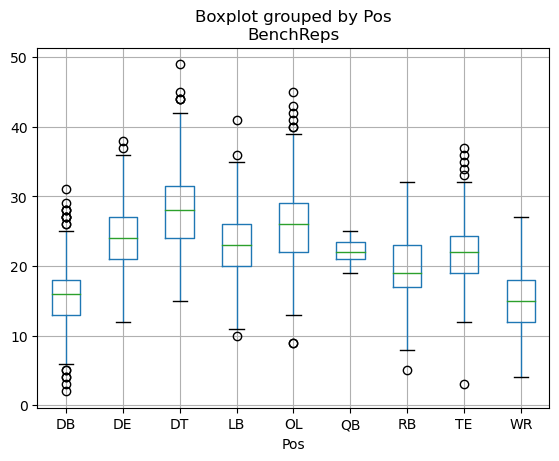

In [76]:
#Bench Press
no_UDFAs.boxplot(column='BenchReps', by='Pos')
#Unsurpringly, the linemen perform better on average for benchpress

<AxesSubplot:title={'center':'BroadJump'}, xlabel='Pos'>

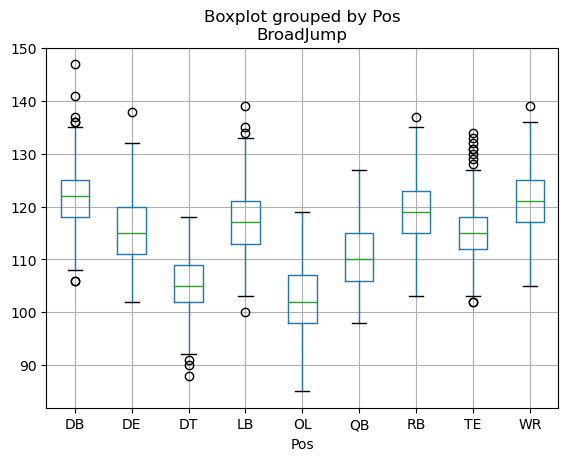

In [77]:
#Broad Jump
no_UDFAs.boxplot(column='BroadJump', by='Pos')
#Similar expectations to the vertical jump, with the skill positions leading the way

<AxesSubplot:title={'center':'Cone'}, xlabel='Pos'>

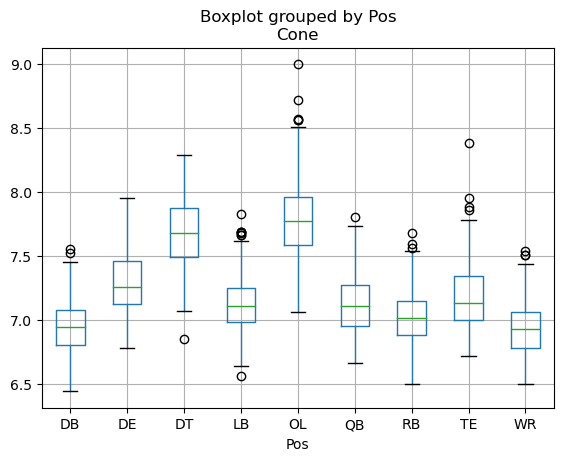

In [78]:
#Cone Drill
no_UDFAs.boxplot(column='Cone', by='Pos')
#The cone drill is closer than I anticipated between many positions, especially tightends and fullbacks compared to other skill positions.

<AxesSubplot:title={'center':'Shuttle'}, xlabel='Pos'>

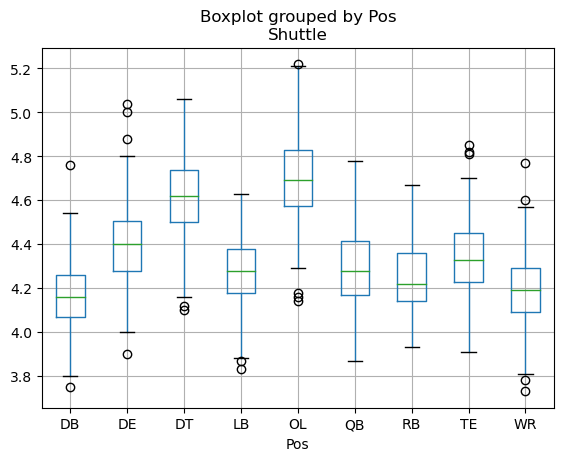

In [79]:
#Shuttle Drill
no_UDFAs.boxplot(column='Shuttle', by='Pos')
#The shuttle drill is also closer than anticipated as tight ends and fullbacks are usually taller and heavier than other skill positions.